In [1]:
import io
import numpy as np
import pandas as pd
import keras
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
df = pd.DataFrame(np.random.rand(200, 6))

In [3]:
df.describe(include='all')

,0,1,2,3,4,5
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.490882,0.488649,0.483251,0.517662,0.477526,0.485938
std,0.291734,0.281928,0.315108,0.303001,0.299485,0.297701
min,0.004397,0.007053,0.000756,0.001989,0.004902,0.004614
25%,0.231285,0.253504,0.200502,0.231395,0.196270,0.222995
50%,0.486069,0.495548,0.489603,0.533207,0.465559,0.490857
75%,0.735415,0.706138,0.740027,0.779257,0.742798,0.736672
max,0.998243,0.997212,0.993103,0.995156,0.998414,0.974800


In [4]:
df.corr()

,0,1,2,3,4,5
0,1.000000,0.028846,-0.080261,0.071279,0.157581,0.079100
1,0.028846,1.000000,-0.155563,0.022409,0.154452,0.127633
2,-0.080261,-0.155563,1.000000,-0.026262,-0.088147,-0.103559
3,0.071279,0.022409,-0.026262,1.000000,0.107722,-0.004292
4,0.157581,0.154452,-0.088147,0.107722,1.000000,0.096646
5,0.079100,0.127633,-0.103559,-0.004292,0.096646,1.000000


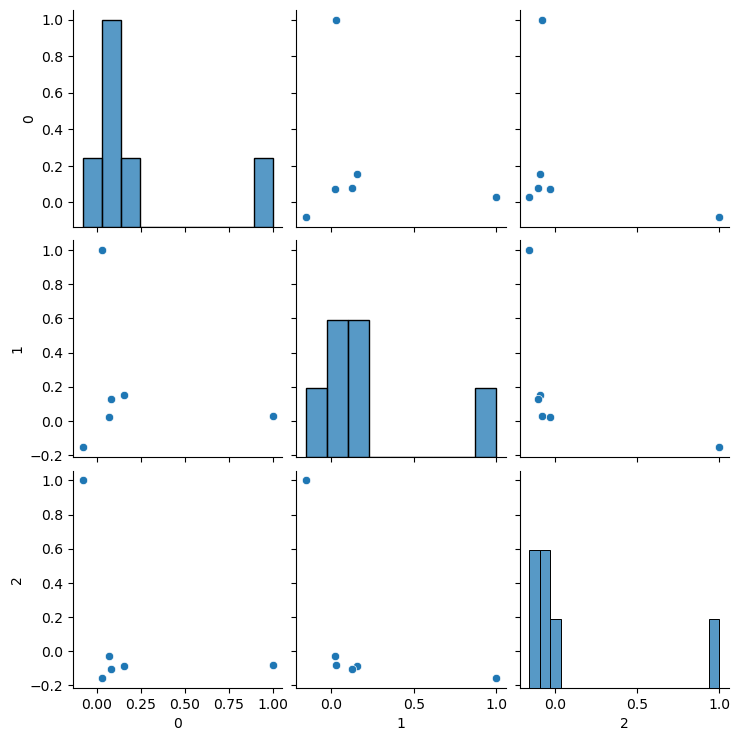

In [5]:
sns.pairplot(df.corr(), x_vars = [0, 1, 2], y_vars = [0, 1, 2]) #its so cool i'mlosing my mind

## Here, we start building and training models
### Starting with defining functions to view model info

def make_plots(df, feature_names, label_names, model_output, sample_size = 200):
    random_sample = df.sample(n=sample_size).copy()
    random_sample.reset_index()
    weights, bias, epochs, rmse = model_output
    